## Model Evaluation

### Changing to the main directory


In [1]:
%cd ..

/home/isham/Desktop/machine-learning-projects/misc_ai_projects/elec-device-feedback-classification


/home/isham/anaconda3/envs/image_classification/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


### Importing Necessary Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

### Plotting the Results

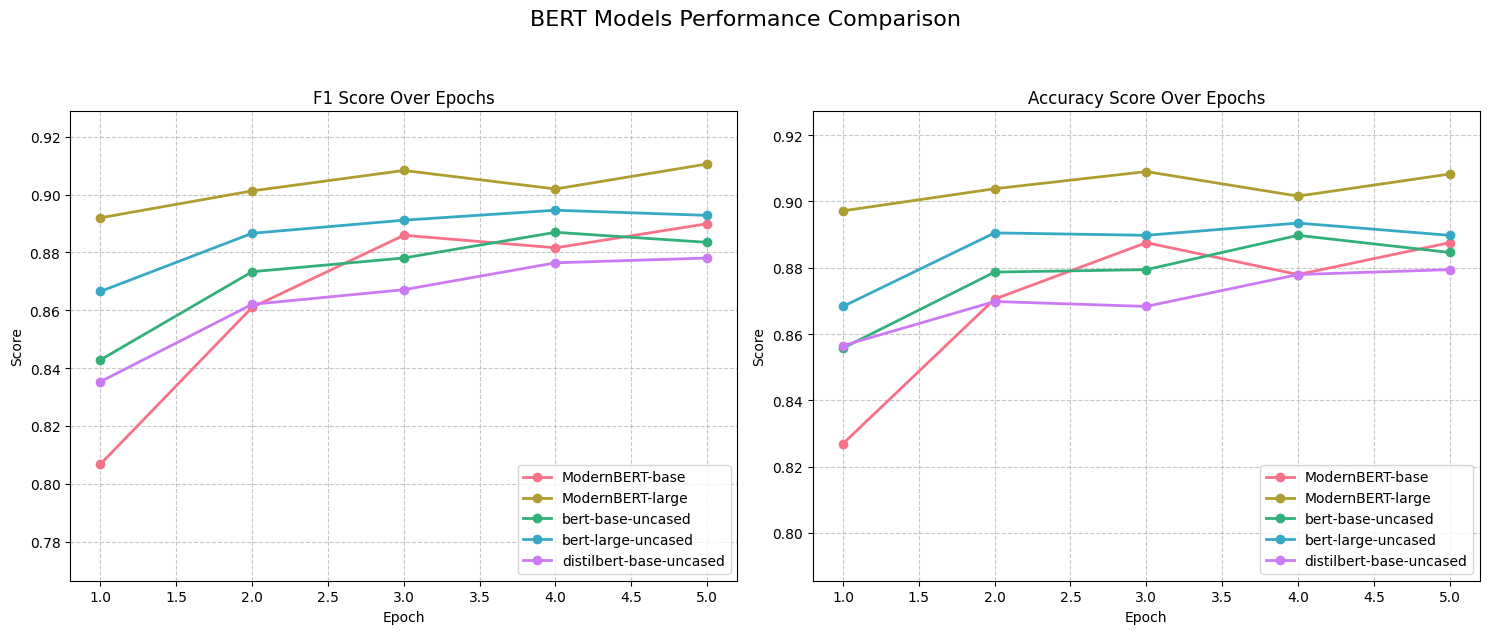


Final Metrics Comparison:
                  model  eval_f1  eval_accuracy
       ModernBERT-large   0.9106         0.9083
     bert-large-uncased   0.8928         0.8898
        ModernBERT-base   0.8899         0.8876
      bert-base-uncased   0.8835         0.8846
distilbert-base-uncased   0.8781         0.8794


In [7]:
def load_results(file_paths):
    all_data = []
    for file_path in file_paths:
        try:
            df = pd.read_csv(file_path)
            # Extract model name more robustly using Path
            model_name = Path(file_path).stem.replace('electrical-classification-', '').replace('-results', '')
            df['model'] = model_name
            all_data.append(df)
        except Exception as e:
            print(f"Error loading {file_path}: {e}")
    
    return pd.concat(all_data, ignore_index=True)

# File paths remain the same
files = [
    'logs/electrical-classification-bert-base-uncased-results.csv',
    'logs/electrical-classification-bert-large-uncased-results.csv', 
    'logs/electrical-classification-distilbert-base-uncased-results.csv',
    'logs/electrical-classification-ModernBERT-base-results.csv',
    'logs/electrical-classification-ModernBERT-large-results.csv'
]

def create_comparison_plots(df, save_path='bert_comparison.png'):
    # Set the style with better defaults
    # plt.style.use('seaborn-darkgrid')
    
    # Create figure with 2 subplots in a single row
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle('BERT Models Performance Comparison', fontsize=16, y=1.05)

    metrics = ['eval_f1', 'eval_accuracy']
    colors = sns.color_palette('husl', n_colors=len(df['model'].unique()))

    for idx, metric in enumerate(metrics):
        ax = axes[idx]
        
        # Plot each model's performance
        for (model, group), color in zip(df.groupby('model'), colors):
            ax.plot(group['epoch'], group[metric], 
                   marker='o', label=model, 
                   linewidth=2, 
                   color=color,
                   markersize=6)
        
        # Enhance the plot
        ax.set_title(f"{metric.replace('eval_', '').title()} Score Over Epochs",
                    fontsize=12)
        ax.set_xlabel('Epoch', fontsize=10)
        ax.set_ylabel('Score', fontsize=10)
        ax.grid(True, linestyle='--', alpha=0.7)
        # Changed legend position to bottom right inside the plot
        ax.legend(loc='lower right')
        ax.set_ylim(df[metric].min() * 0.95, df[metric].max() * 1.02)

    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

    # Print detailed final metrics
    final_metrics = df[df['epoch'] == df['epoch'].max()].sort_values('eval_f1', ascending=False)
    print("\nFinal Metrics Comparison:")
    pd.set_option('display.float_format', '{:.4f}'.format)
    comparison_table = final_metrics[['model', 'eval_f1', 'eval_accuracy']].reset_index(drop=True)
    print(comparison_table.to_string(index=False))
    
    return comparison_table

# Load and create visualizations
df = load_results(files)
final_metrics = create_comparison_plots(df)